# Decorated Decision Tree Regressor

This notebook contains an example of how to use the decorated decision tree regressor.

The `DecoratedDecisionTreeRegressor` is a custom machine learning algorithm which extends sklearn's `DecisionTreeRegressor` by allowing any regression model to be fit on the leaves of a decision tree.

First, we import the necessary packages needed for this example.

In [1]:
from DecoratedDecisionTree import DecoratedDecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this example, we will try to make the decorated tree fit $y = X^2 + \epsilon$ where $\epsilon \sim \text{N}(0, \sigma).$  We construct some artificial data:

In [2]:
sigma = 20000
data = pd.DataFrame({'X': np.arange(-500, 500)})
noise = np.random.normal(0, sigma, len(data))
data['y'] = data['X']**2
data['y_jitter'] = data['y'] + noise

data.head()

,X,y,y_jitter
0,-500,250000,237831.402060
1,-499,249001,265119.904825
2,-498,248004,235035.901439
3,-497,247009,258141.820300
4,-496,246016,247215.665804


We now contruct a `DecoratedDecisionTreeRegressor` object.

In [3]:
DecoratedDecisionTreeRegressor?

Init signature: DecoratedDecisionTreeRegressor(dtr, decorator)
Docstring:      <no docstring>
Init docstring:
Creates a decorated decision tree regressor.  A decision tree is fit 
according to the supplied DecisionTreeRegressor.  The data on the
leaves of the tree are fit according to a supplied decorator
which is a regression algorithm.

Parameters
----------
dtr : sklearn.tree.DecisionTreeRegressor
    Decision tree regressor
decorator : Regressor
    Regression algorithm used to fit the data at the leaves of the tree.
File:           c:\users\tj\documents\code\decorateddecisiontree\decorateddecisiontree.py
Type:           type
Subclasses:     


Notice the `DecoratedDecisionTreeRegressor` requires two parameters: a decision tree regressor and a regressor used to fit the leaves of the tree.

For our base tree, we require each of our leaves to have at least 120 data points.  Once the decision tree is built, we improve the predictions by fitting the data in the leaves using linear regression.

In [4]:
ddtr = DecoratedDecisionTreeRegressor(dtr = DecisionTreeRegressor(min_samples_leaf=120), 
                                      decorator = LinearRegression())

Now, use the regressor to fit the decorated decision tree model and make a prediction.

In [5]:
ddtr.fit(data[['X']], data['y_jitter'])
data['y_decorated_tree'] = ddtr.predict(data[['X']])

data.head()

,X,y,y_jitter,y_decorated_tree
0,-500,250000,237831.402060,246225.121069
1,-499,249001,265119.904825,245397.813276
2,-498,248004,235035.901439,244570.505484
3,-497,247009,258141.820300,243743.197691
4,-496,246016,247215.665804,242915.889899


Once the decorated decision tree is fit, you are able to access the base decision tree as follows

In [6]:
# The base decision tree regressor
ddtr.dtr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=120, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Let's take a look what what the base tree predicts `y` should be.

In [7]:
# Predict using the base tree
data['y_base_tree'] = ddtr.dtr.predict(data[['X']])
data.head()

,X,y,y_jitter,y_decorated_tree,y_base_tree
0,-500,250000,237831.402060,246225.121069,187486.267792
1,-499,249001,265119.904825,245397.813276,187486.267792
2,-498,248004,235035.901439,244570.505484,187486.267792
3,-497,247009,258141.820300,243743.197691,187486.267792
4,-496,246016,247215.665804,242915.889899,187486.267792


Let's plot the predictions of the decorated tree compared to the base tree to see how well they did.

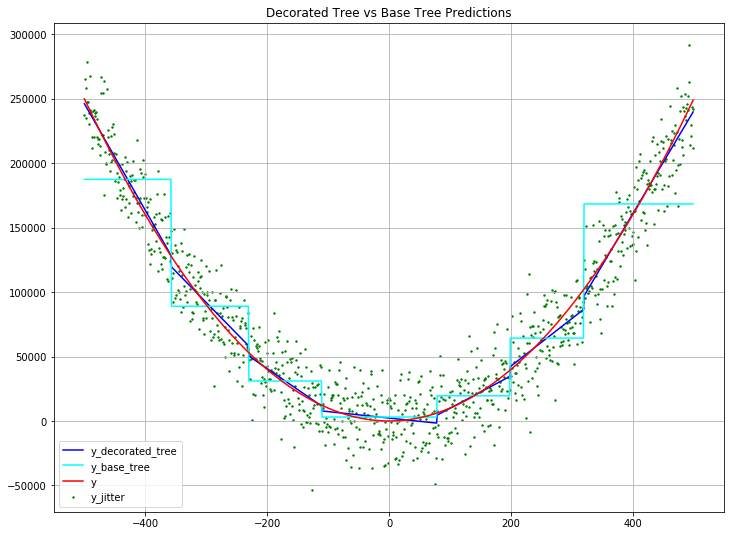

In [8]:
fig = plt.figure(figsize = (1.5*8, 1.5*6))
ax = plt.axes()
ax.set_title('Decorated Tree vs Base Tree Predictions')
ax.scatter(data['X'], data['y_jitter'], color='green', label='y_jitter', s=2)
ax.plot(data['X'], data['y_decorated_tree'], color='blue', label = 'y_decorated_tree')
ax.plot(data['X'], data['y_base_tree'], color='cyan', label = 'y_base_tree')
ax.plot(data['X'], data['y'], color='red', label='y')
ax.legend()
ax.grid()

Notice that a decorated tree does a better job at predicting `y` than the base tree.

In [9]:
print('RMSD Decorated Tree:', int(mean_squared_error(data['y_decorated_tree'], data['y'])**0.5))
print('RMSD Base Tree     :', int(mean_squared_error(data['y_base_tree'], data['y'])**0.5))

RMSD Decorated Tree: 3553
RMSD Base Tree     : 25279
